In [15]:
#Importo las librerias Openquake, Numpy y Pandas para iniciar la carga del catálogo sísmico.
import numpy as np
import pandas as pd
from openquake.hmtk.parsers.catalogue import CsvCatalogueParser

catalogo = pd.read_csv("catalogo.csv", sep=',', index_col=0, decimal=',')
catalogue_filename = 'catalogo.csv'
parser = CsvCatalogueParser (catalogue_filename)
catalogue = parser.read_file()
#cargo el catálogo en la memoria

In [16]:
#Imprimo una pequeña visualización del dataframe
catalogo.head()

,year,month,day,hour,minute,second,longitude,latitude,depth,magnitude,sigmaMagnitude
eventID,,,,,,,,,,,
1,2007,1,5,3,19,0,-731150,66760,152,2.8,2.8
2,2007,1,7,18,20,0,-731490,67350,164,2.2,2.2
3,2007,1,7,21,11,0,-732190,67760,149,2.6,2.6
4,2007,1,10,23,13,0,-731100,67380,171,2.4,2.4
5,2007,1,11,2,51,0,-731170,67240,158,2,2


In [3]:
#metodo para agregar los datos de declusterización de gardner y knopoff
from openquake.hmtk.seismicity.declusterer.distance_time_windows import UhrhammerWindow

http://www.eaee.org/Media/Default/2ECCES/2ecces_ss/2910.pdf

In [4]:
#Asigno la configuración para realizar el declusterizado.
declust_config = {'time_distance_window': UhrhammerWindow(),
                 'fs_time_prop': 1.0}

In [5]:
#cargo el metodo para calcular los foreshocks y aftershocks
from openquake.hmtk.seismicity.declusterer.dec_gardner_knopoff import GardnerKnopoffType1
#inicializo el metodo
declustering = GardnerKnopoffType1 ()
#adiciono las columnas de la declusterización al catálogo
cluster_index, cluster_flag = declustering.decluster (catalogue, declust_config)

In [6]:
#Creo una copia del catalogo y elimino los after y foreshocks.
import copy
catalogue_dec_uh = copy.deepcopy(catalogue)
mainshock_flag_uh = cluster_flag == 0 
catalogue_dec_uh.purge_catalogue(mainshock_flag_uh)

In [7]:
#Comparo el numero de eventos totales después de la declusterización contra el catálogo original
#metodo para conocer el numero de eventos totales después de la declusterización.
print (catalogue_dec_uh.get_number_events())
print (catalogue.get_number_events())

1736
1754


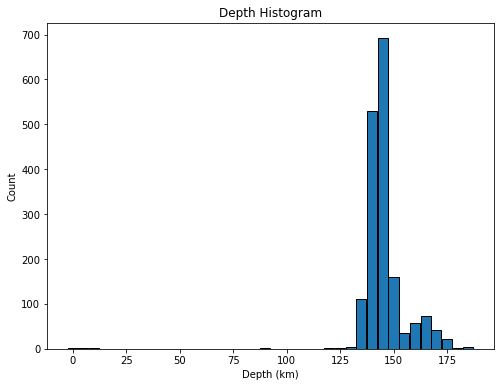

In [8]:
#Configuro la visualización del histograma de la profundidad de los eventos del catálogo declusterizado.
from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_depth_histogram
depth_bin = 5.0
plot_depth_histogram(catalogue_dec_uh,
                    depth_bin,
                    filename = "image.eps",
                    filetype= "eps")

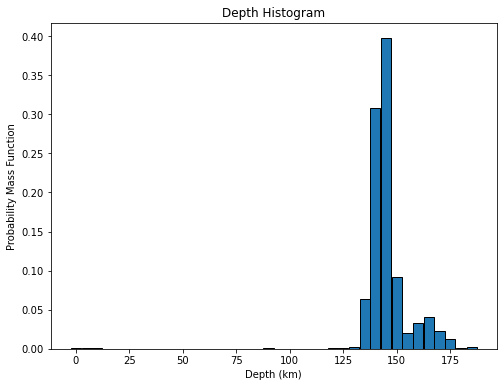

In [9]:
#Imprimo el histograma
plot_depth_histogram(catalogue, 5., normalisation=True)

C:\Users\yesid\anaconda3\lib\site-packages\openquake\hmtk\plotting\seismicity\catalogue_plots.py:162: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolor(mag_bins[:-1],


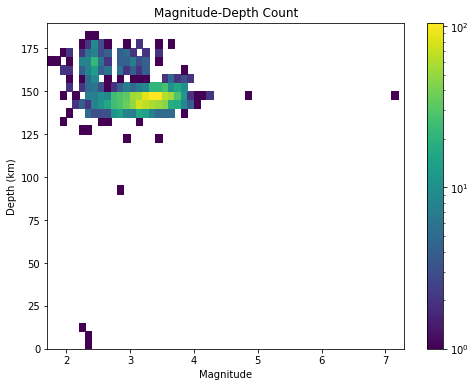

In [10]:
#Configuro la visualización para apreciar la profundidad versus las magnitudes del catálogo declusterizado.
from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_depth_density
magnitude_bin = 0.1
depth_bin = 5.0
plot_magnitude_depth_density(catalogue_dec_uh,
                             magnitude_bin,
                             depth_bin,
                             logscale=True,
                             filename = "image2.eps",
                             filetype= "eps")

C:\Users\yesid\anaconda3\lib\site-packages\openquake\hmtk\plotting\seismicity\catalogue_plots.py:280: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolor(time_bins[:-1],


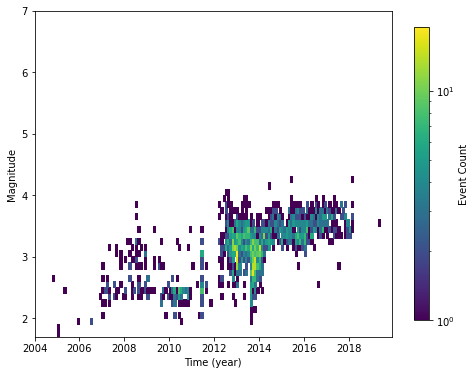

In [11]:
#Configuro una visualización del histograma del catálogo declusterizado para comparar las magnitudes a travez del tiempo.
from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_time_density
magnitude_bin_width = 0.1
time_bin_width = 0.1
plot_magnitude_time_density(catalogue_dec_uh,
                             magnitude_bin_width,
                             time_bin_width,
                             filename = "image3.eps",
                             filetype= "eps")

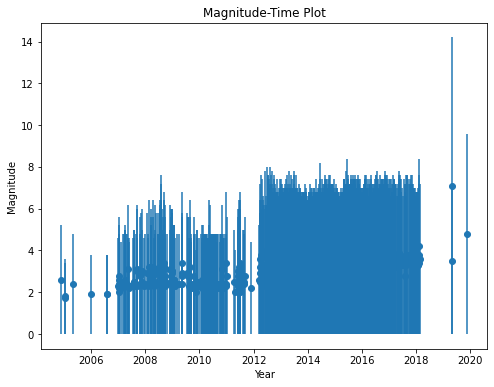

In [12]:
#Configuro y visualizo un segundo histograma para comparar la magnitud a travez del tiempo con el catálogo original
from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_time_scatter
plot_magnitude_time_scatter(catalogue, plot_error=True)

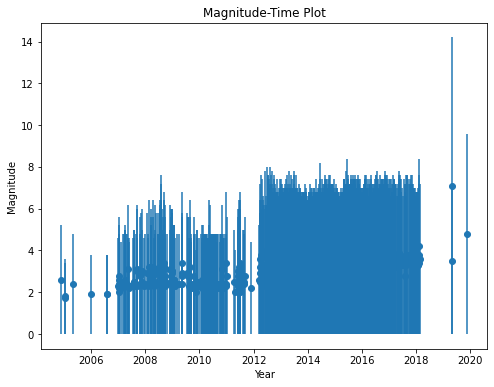

In [13]:
#Configuro y visualizo un segundo histograma para comparar la magnitud a travez del tiempo con el catálogo declusterizado
plot_magnitude_time_scatter(catalogue_dec_uh, plot_error=True)

(array([164., 142., 411., 265., 290., 398.,  74.,   6.,   4.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27.]),
 <BarContainer object of 9 artists>)

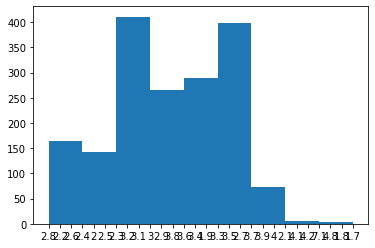

In [18]:
#Visualización del histograma de la Magnitud del catálogo sin declusterizar
import matplotlib.pyplot as plt
depth_bins = np.arange(0.,160.,10.)
depth_hist = catalogue.get_depth_distribution(depth_bins, normalisation=True, bootstrap=None)
plt.hist(catalogo['magnitude'],9)


In [19]:
#Generación del catálogo declusterizado en un archivo llamado salida.csv
from openquake.hmtk.parsers.catalogue.csv_catalogue_parser import CsvCatalogueWriter

catalogue_outputfile = 'salida.csv'
output = CsvCatalogueWriter(catalogue_outputfile)
output.write_file(catalogue_dec_uh)


OSError: Catalogue output file salida.csv already exists!

In [20]:
#Lectura del archivo salida.csv
catalogo_declusterizado = pd.read_csv("salida.csv", sep=',', index_col=0, decimal='.')
catalogo_declusterizado

,Agency,year,month,day,hour,minute,second,timeError,longitude,latitude,SemiMajor90,SemiMinor90,ErrorStrike,depth,depthError,magnitude,sigmaMagnitude,magnitudeType
eventID,,,,,,,,,,,,,,,,,,
1,NaN,2007,1,5,3,19,0.0,NaN,-731150.0,66760.0,NaN,NaN,NaN,152.0,NaN,2.8,2.8,NaN
2,NaN,2007,1,7,18,20,0.0,NaN,-731490.0,67350.0,NaN,NaN,NaN,164.0,NaN,2.2,2.2,NaN
3,NaN,2007,1,7,21,11,0.0,NaN,-732190.0,67760.0,NaN,NaN,NaN,149.0,NaN,2.6,2.6,NaN
4,NaN,2007,1,10,23,13,0.0,NaN,-731100.0,67380.0,NaN,NaN,NaN,171.0,NaN,2.4,2.4,NaN
5,NaN,2007,1,11,2,51,0.0,NaN,-731170.0,67240.0,NaN,NaN,NaN,158.0,NaN,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,NaN,2005,4,24,3,9,0.0,NaN,-731660.0,67390.0,NaN,NaN,NaN,160.0,NaN,2.4,2.4,NaN
1751,NaN,2005,12,23,4,53,0.0,NaN,-731230.0,67720.0,NaN,NaN,NaN,164.0,NaN,1.9,1.9,NaN
1752,NaN,2006,7,30,13,53,0.0,NaN,-731760.0,67470.0,NaN,NaN,NaN,146.0,NaN,1.9,1.9,NaN


# Generación de datos estádisticos del catálogo.

In [21]:
#Datos estádisticos básicos
estadisticos = catalogo_declusterizado.describe(include='all')
estadisticos

,Agency,year,month,day,hour,minute,second,timeError,longitude,latitude,SemiMajor90,SemiMinor90,ErrorStrike,depth,depthError,magnitude,sigmaMagnitude,magnitudeType
count,0.0,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.0,0.0,1736.000000,1736.000000,0.0,0.0,0.0,1736.000000,0.0,1736.000000,1736.000000,0.0
mean,NaN,2013.186060,6.751152,16.061060,11.240783,29.517281,0.0,NaN,-731397.200461,68091.705069,NaN,NaN,NaN,147.551267,NaN,3.110484,3.110484,NaN
std,NaN,2.238632,3.567747,9.014479,7.017777,17.106237,0.0,NaN,336.847218,339.562486,NaN,NaN,NaN,10.435956,NaN,0.425058,0.425058,NaN
min,NaN,2004.000000,1.000000,1.000000,0.000000,0.000000,0.0,NaN,-732800.000000,66500.000000,NaN,NaN,NaN,1.000000,NaN,1.700000,1.700000,NaN
25%,NaN,2012.000000,4.000000,8.000000,5.000000,15.000000,0.0,NaN,-731570.000000,67970.000000,NaN,NaN,NaN,143.000000,NaN,2.900000,2.900000,NaN
50%,NaN,2013.000000,7.000000,16.000000,11.000000,29.000000,0.0,NaN,-731440.000000,68120.000000,NaN,NaN,NaN,146.000000,NaN,3.200000,3.200000,NaN
75%,NaN,2015.000000,10.000000,24.000000,17.000000,44.000000,0.0,NaN,-731280.000000,68240.000000,NaN,NaN,NaN,149.000000,NaN,3.400000,3.400000,NaN
max,NaN,2019.000000,12.000000,31.000000,23.000000,59.000000,0.0,NaN,-729520.000000,69370.000000,NaN,NaN,NaN,187.000000,NaN,7.100000,7.100000,NaN


In [22]:
#Cálculo de la Desviación Media Absoluta
mad = catalogo_declusterizado.mad()
mad

Agency                   NaN
year                1.589771
month               3.116827
day                 7.825870
hour                6.100595
minute             14.773121
second              0.000000
timeError                NaN
longitude         219.589779
latitude          221.488352
SemiMajor90              NaN
SemiMinor90              NaN
ErrorStrike              NaN
depth               5.951815
depthError               NaN
magnitude           0.332461
sigmaMagnitude      0.332461
magnitudeType            NaN
dtype: float64

In [23]:
#Cálculo de la Desviación Moda
mode = catalogo_declusterizado.mode()
mode

,Agency,year,month,day,hour,minute,second,timeError,longitude,latitude,SemiMajor90,SemiMinor90,ErrorStrike,depth,depthError,magnitude,sigmaMagnitude,magnitudeType
0,NaN,2013.0,11.0,27.0,1,10.0,0.0,NaN,-731510.0,68160.0,NaN,NaN,NaN,145.0,NaN,3.3,3.3,NaN
1,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Cálculo de la Varianza
variance = catalogo_declusterizado.var()
variance

Agency                      NaN
year                   5.011471
month                 12.728817
day                   81.260823
hour                  49.249195
minute               292.623332
second                 0.000000
timeError                   NaN
longitude         113466.048553
latitude          115302.681842
SemiMajor90                 NaN
SemiMinor90                 NaN
ErrorStrike                 NaN
depth                108.909186
depthError                  NaN
magnitude              0.180674
sigmaMagnitude         0.180674
magnitudeType               NaN
dtype: float64

In [25]:
#Cálculo de la Curtosis
kurtosis = catalogo_declusterizado.kurtosis()
kurtosis

Agency                  NaN
year               1.087434
month             -1.250733
day               -1.241870
hour              -1.228713
minute            -1.164129
second             0.000000
timeError               NaN
longitude          7.281844
latitude           4.521477
SemiMajor90             NaN
SemiMinor90             NaN
ErrorStrike             NaN
depth             59.205063
depthError              NaN
magnitude          4.147623
sigmaMagnitude     4.147623
magnitudeType           NaN
dtype: float64

In [26]:
#Cálculo del Sesgo
skewness = catalogo_declusterizado.skew()
skewness

Agency                 NaN
year             -0.704831
month            -0.203151
day              -0.049673
hour              0.068333
minute            0.026997
second            0.000000
timeError              NaN
longitude         1.637318
latitude         -0.730035
SemiMajor90            NaN
SemiMinor90            NaN
ErrorStrike            NaN
depth            -3.426350
depthError             NaN
magnitude        -0.024804
sigmaMagnitude   -0.024804
magnitudeType          NaN
dtype: float64

In [27]:
#Compilación de los Cálculos estadísticos para cada una de las columnas del catálogo sísmico
estadisticos.reset_index(inplace=True)
estadisticos = estadisticos.append(mad, ignore_index=True)
estadisticos = estadisticos.append(variance, ignore_index=True)
estadisticos = estadisticos.append(skewness, ignore_index=True)
estadisticos = estadisticos.append(kurtosis, ignore_index=True)
estadisticos = estadisticos.append(mode.iloc[0])
estadisticos.iloc[8,0]= "desviacion media absoluta"
estadisticos.iloc[9,0]= "varianza"
estadisticos.iloc[10,0]= "sesgo"
estadisticos.iloc[11,0]= "curtosis"
estadisticos.iloc[12,0]= "moda"
estadisticos

,index,Agency,year,month,day,hour,minute,second,timeError,longitude,latitude,SemiMajor90,SemiMinor90,ErrorStrike,depth,depthError,magnitude,sigmaMagnitude,magnitudeType
0,count,0.0,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.0,0.0,1736.000000,1736.000000,0.0,0.0,0.0,1736.000000,0.0,1736.000000,1736.000000,0.0
1,mean,NaN,2013.186060,6.751152,16.061060,11.240783,29.517281,0.0,NaN,-731397.200461,68091.705069,NaN,NaN,NaN,147.551267,NaN,3.110484,3.110484,NaN
2,std,NaN,2.238632,3.567747,9.014479,7.017777,17.106237,0.0,NaN,336.847218,339.562486,NaN,NaN,NaN,10.435956,NaN,0.425058,0.425058,NaN
3,min,NaN,2004.000000,1.000000,1.000000,0.000000,0.000000,0.0,NaN,-732800.000000,66500.000000,NaN,NaN,NaN,1.000000,NaN,1.700000,1.700000,NaN
4,25%,NaN,2012.000000,4.000000,8.000000,5.000000,15.000000,0.0,NaN,-731570.000000,67970.000000,NaN,NaN,NaN,143.000000,NaN,2.900000,2.900000,NaN
5,50%,NaN,2013.000000,7.000000,16.000000,11.000000,29.000000,0.0,NaN,-731440.000000,68120.000000,NaN,NaN,NaN,146.000000,NaN,3.200000,3.200000,NaN
6,75%,NaN,2015.000000,10.000000,24.000000,17.000000,44.000000,0.0,NaN,-731280.000000,68240.000000,NaN,NaN,NaN,149.000000,NaN,3.400000,3.400000,NaN
7,max,NaN,2019.000000,12.000000,31.000000,23.000000,59.000000,0.0,NaN,-729520.000000,69370.000000,NaN,NaN,NaN,187.000000,NaN,7.100000,7.100000,NaN
8,desviacion media absoluta,NaN,1.589771,3.116827,7.825870,6.100595,14.773121,0.0,NaN,219.589779,221.488352,NaN,NaN,NaN,5.951815,NaN,0.332461,0.332461,NaN
9,varianza,NaN,5.011471,12.728817,81.260823,49.249195,292.623332,0.0,NaN,113466.048553,115302.681842,NaN,NaN,NaN,108.909186,NaN,0.180674,0.180674,NaN
